In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math as m 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
SIE = pd.read_csv("data/siemens.csv")
DTE = pd.read_csv("data/deutsche-telekom.csv")
ALV = pd.read_csv("data/allianz.csv")
MRK = pd.read_csv("data/merck-kgaa.csv")
DHL = pd.read_csv("data/deutsche-post.csv")

In [3]:
# Change Dtype of Date column
SIE["Date"] = pd.to_datetime(SIE["Date"])
DTE["Date"] = pd.to_datetime(DTE["Date"])
ALV["Date"] = pd.to_datetime(ALV["Date"])
MRK["Date"] = pd.to_datetime(MRK["Date"])
DHL["Date"] = pd.to_datetime(DHL["Date"])

In [4]:
#set indext as date
SIE.set_index('Date', inplace=True)
DTE.set_index('Date', inplace=True)
ALV.set_index('Date', inplace=True)
MRK.set_index('Date', inplace=True)
DHL.set_index('Date', inplace=True)

In [5]:
# Set date variable
start_date = '2010-01-04' # Start date of training set
end_date = '2020-10-07' # End date of training set
test_start_date = '2020-10-08' # End date of test set
test_end_date = '2023-06-30' # End date of test set

In [6]:
SIE.drop(columns=['High','Low','Open','Volume', 'Dividends', 'Stock Splits', 'Ticker', 'ps-ratio'],inplace=True)
DTE.drop(columns=['High','Low','Open','Volume', 'Dividends', 'Stock Splits', 'Ticker', 'ps-ratio'],inplace=True)
ALV.drop(columns=['High','Low','Open','Volume', 'Dividends', 'Stock Splits', 'Ticker', 'ps-ratio'],inplace=True)
MRK.drop(columns=['High','Low','Open','Volume', 'Dividends', 'Stock Splits', 'Ticker', 'ps-ratio'],inplace=True)
DHL.drop(columns=['High','Low','Open','Volume', 'Dividends', 'Stock Splits', 'Ticker', 'ps-ratio'],inplace=True)

In [7]:
# Backup data
SIE_base = SIE.copy()
DTE_base = DTE.copy()
ALV_base = ALV.copy()
MRK_base = MRK.copy()
DHL_base = DHL.copy()

# Siemens 1 Features

In [8]:
#Set next day value as target 
SIE['Target'] = SIE.Close.shift(-1)
SIE.dropna(inplace=True)
SIE

,Close,pe-ratio,pb-ratio,Target
Date,,,,
2010-01-04,39.892437,21.092000,1.938798,39.916805
2010-01-05,39.916805,21.092000,1.938798,40.063042
2010-01-06,40.063042,21.092000,1.938798,40.538315
2010-01-07,40.538315,21.092000,1.938798,40.794235
2010-01-08,40.794235,21.092000,1.938798,40.897816
...,...,...,...,...
2023-06-23,156.979996,19.691292,1.998793,155.479996
2023-06-26,155.479996,19.691292,1.998793,157.559998
2023-06-27,157.559998,19.691292,1.998793,152.720001


In [9]:
#split train and test data
SIE_train = SIE.loc[:end_date]
SIE_test = SIE.loc[test_start_date:]

In [10]:
# Reconcile length of data set and subsets
SIE.shape[0] == SIE_train.shape[0] + SIE_test.shape[0]

True

In [11]:
#set variables for regression
SIE_X_train = SIE_train[['Close']]
SIE_y_train = SIE_train['Target']
SIE_X_test = SIE_test[['Close']]
SIE_y_test = SIE_test['Target']

In [12]:
#creating regressor model
model1 = LinearRegression()

In [13]:
# fit liner regression model
model1 = model1.fit(SIE_X_train, SIE_y_train)

In [14]:
model1.score(SIE_X_train, SIE_y_train)

0.9967533332202817

In [15]:
model1.coef_

array([0.99823649])

In [16]:
model1.intercept_

0.1516030319741759

In [17]:
pred = model1.predict(SIE_X_test)

In [18]:
SIE_test['Predicted_Close'] = pred

In [19]:
SIE_test

,Close,pe-ratio,pb-ratio,Target,Predicted_Close
Date,,,,,
2020-10-08,102.015335,21.575999,2.165320,102.678017,101.987033
2020-10-09,102.678017,21.575999,2.165320,103.487961,102.648546
2020-10-12,103.487961,21.575999,2.165320,102.383484,103.457061
2020-10-13,102.383484,21.575999,2.165320,103.451141,102.354532
2020-10-14,103.451141,21.575999,2.165320,100.634758,103.420307
...,...,...,...,...,...
2023-06-23,156.979996,19.691292,1.998793,155.479996,156.854762
2023-06-26,155.479996,19.691292,1.998793,157.559998,155.357408
2023-06-27,157.559998,19.691292,1.998793,152.720001,157.433741


In [20]:
#again return to previous shape
SIE_y_test = np.array(SIE_test['Target'])

In [21]:
#checking mse and rmse 
SIE_mse = mean_squared_error(SIE_y_test, SIE_test['Predicted_Close'])
SIE_rmse = m.sqrt(SIE_mse)
SIE_mape = np.mean(np.abs(SIE_test['Predicted_Close'] - SIE_y_test)/np.abs(SIE_y_test))

print(f'Root Mean Squared Error (RMSE): {SIE_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {SIE_mape}')

Root Mean Squared Error (RMSE): 2.3609705028953902
Mean Absolute Percentage Error (MAPE): 0.014107109723454043


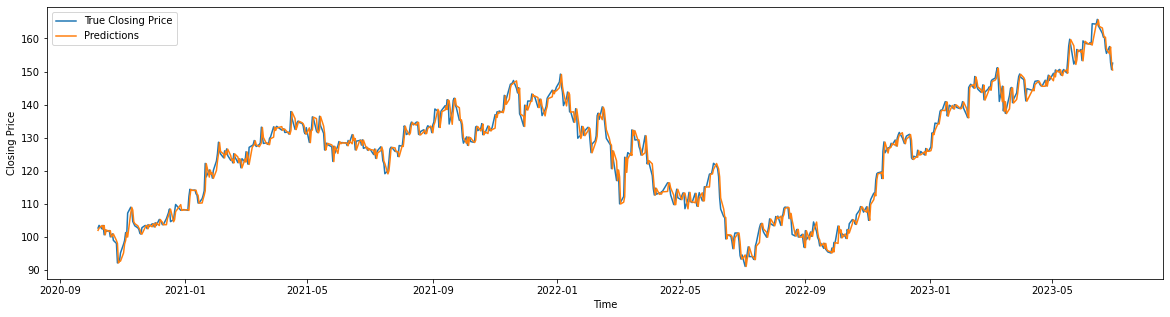

In [22]:
#plotting predicted data
plt.figure(figsize=(20, 5))
plt.plot(SIE_test['Target'], label = 'True Closing Price')
plt.plot(SIE_test['Predicted_Close'], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(labels = ['True Closing Price', 'Predictions'])

In [23]:
len(SIE_test)

695

In [24]:
# Create a dataframe that has same index as Siemens dataframe
result1 = pd.DataFrame(index=SIE_base.index)
# Extract actual data from alv
tem1 = SIE_base['Close'].tolist()[:len(SIE_base)-695]
# Extract forecasted date from above result
tem2 = SIE_test['Predicted_Close'].tolist()
# Combine them to a list
tem3 = tem1 + tem2
# Create a column from the resulted list
result1['SIE'] = tem3
# Mark forecasted or not for each line
result1['Forecasted'] = 'N'
result1.loc[result1.index[-695:], 'Forecasted'] = 'Y'
result1

,SIE,Forecasted
Date,,
2010-01-04,39.892437,N
2010-01-05,39.916805,N
2010-01-06,40.063042,N
2010-01-07,40.538315,N
2010-01-08,40.794235,N
...,...,...
2023-06-26,156.854762,Y
2023-06-27,155.357408,Y
2023-06-28,157.433741,Y


# Deutsche Telekom 1 Features

In [25]:
#Set next day value as target 
DTE['Target'] = DTE.Close.shift(-1)
DTE.dropna(inplace=True)
DTE

,Close,pe-ratio,pb-ratio,Target
Date,,,,
2010-01-04,4.953136,128.625000,1.070129,4.911083
2010-01-05,4.911083,128.625000,1.070129,4.789590
2010-01-06,4.789590,128.625000,1.070129,4.698472
2010-01-07,4.698472,128.625000,1.070129,4.724171
2010-01-08,4.724171,128.625000,1.070129,4.756881
...,...,...,...,...
2023-06-23,19.558001,5.658228,1.057418,19.695999
2023-06-26,19.695999,5.658228,1.057418,19.906000
2023-06-27,19.906000,5.658228,1.057418,20.030001


In [26]:
#split train and test data
DTE_train = DTE.loc[:end_date]
DTE_test = DTE.loc[test_start_date:]

In [27]:
# Reconcile length of data set and subsets
DTE.shape[0] == DTE_train.shape[0] + DTE_test.shape[0]

True

In [28]:
#set variables for regression
DTE_X_train = DTE_train[['Close']]
DTE_y_train = DTE_train['Target']
DTE_X_test = DTE_test[['Close']]
DTE_y_test = DTE_test['Target']

In [29]:
#creating regressor model
model2 = LinearRegression()

In [30]:
# fit liner regression model
model2 = model2.fit(DTE_X_train, DTE_y_train)

In [31]:
model2.score(DTE_X_train, DTE_y_train)

0.9982755110396586

In [32]:
model2.coef_

array([0.99921479])

In [33]:
model2.intercept_

0.009808596746784914

In [34]:
pred = model2.predict(DTE_X_test)

In [35]:
DTE_test['Predicted_Close'] = pred

In [36]:
DTE_test

,Close,pe-ratio,pb-ratio,Target,Predicted_Close
Date,,,,,
2020-10-08,13.030954,21.651515,0.940896,12.981357,13.030531
2020-10-09,12.981357,21.651515,0.940896,13.067026,12.980972
2020-10-12,13.067026,21.651515,0.940896,13.107607,13.066574
2020-10-13,13.107607,21.651515,0.940896,13.053500,13.107123
2020-10-14,13.053500,21.651515,0.940896,12.643183,13.053059
...,...,...,...,...,...
2023-06-23,19.558001,5.658228,1.057418,19.695999,19.552452
2023-06-26,19.695999,5.658228,1.057418,19.906000,19.690342
2023-06-27,19.906000,5.658228,1.057418,20.030001,19.900178


In [37]:
#again return to previous shape
DTE_y_test = np.array(DTE_test['Target'])

In [38]:
#checking mse and rmse 
DTE_mse = mean_squared_error(DTE_y_test, DTE_test['Predicted_Close'])
DTE_rmse = m.sqrt(DTE_mse)
DTE_mape = np.mean(np.abs(DTE_test['Predicted_Close'] - DTE_y_test)/np.abs(DTE_y_test))

print(f'Root Mean Squared Error (RMSE): {DTE_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {DTE_mape}')

Root Mean Squared Error (RMSE): 0.20757759111914506
Mean Absolute Percentage Error (MAPE): 0.008930361780925416


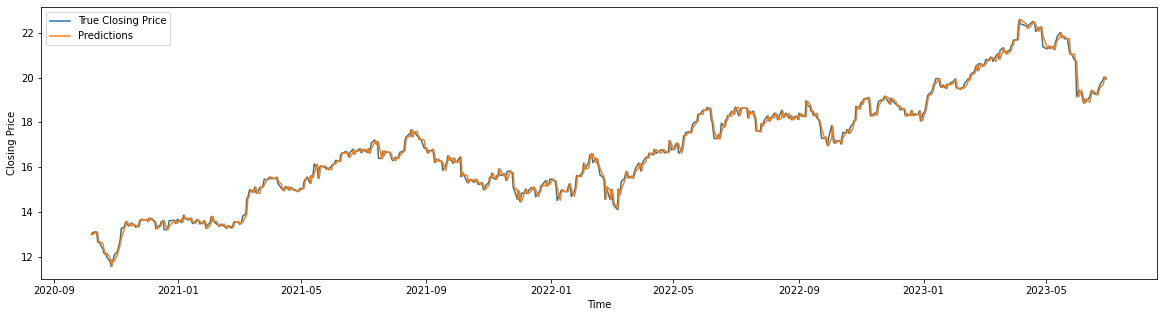

In [39]:
#plotting predicted data
plt.figure(figsize=(20, 5))
plt.plot(DTE_test['Target'], label = 'True Closing Price')
plt.plot(DTE_test['Predicted_Close'], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(labels = ['True Closing Price', 'Predictions'])

In [40]:
# Extract actual data from DTE
tem1 = DTE_base['Close'].tolist()[:len(DTE_base)-695]
# Extract forecasted date from above result
tem2 = DTE_test['Predicted_Close'].tolist()
# Combine them to a list
tem3 = tem1 + tem2
# Create a column from the resulted list
result1['DTE'] = tem3
result1

,SIE,Forecasted,DTE
Date,,,
2010-01-04,39.892437,N,4.953136
2010-01-05,39.916805,N,4.911083
2010-01-06,40.063042,N,4.789590
2010-01-07,40.538315,N,4.698472
2010-01-08,40.794235,N,4.724171
...,...,...,...
2023-06-26,156.854762,Y,19.552452
2023-06-27,155.357408,Y,19.690342
2023-06-28,157.433741,Y,19.900178


# Allianz 1 Features

In [41]:
#Set next day value as target 
ALV['Target'] = ALV.Close.shift(-1)
ALV.dropna(inplace=True)
ALV

,Close,pe-ratio,pb-ratio,Target
Date,,,,
2010-01-04,45.519119,9.154412,1.292624,45.657921
2010-01-05,45.657921,9.154412,1.292624,46.012665
2010-01-06,46.012665,9.154412,1.292624,45.483131
2010-01-07,45.483131,9.154412,1.292624,45.236355
2010-01-08,45.236355,9.154412,1.292624,44.727394
...,...,...,...,...
2023-06-23,209.149994,10.264393,1.461468,209.199997
2023-06-26,209.199997,10.264393,1.461468,211.300003
2023-06-27,211.300003,10.264393,1.461468,211.649994


In [42]:
#split train and test data
ALV_train = ALV.loc[:end_date]
ALV_test = ALV.loc[test_start_date:]

In [43]:
# Reconcile length of data set and subsets
ALV.shape[0] == ALV_train.shape[0] + ALV_test.shape[0]

True

In [44]:
#set variables for regression
ALV_X_train = ALV_train[['Close']]
ALV_y_train = ALV_train['Target']
ALV_X_test = ALV_test[['Close']]
ALV_y_test = ALV_test['Target']

In [45]:
#creating regressor model
model3 = LinearRegression()

In [46]:
# fit liner regression model
model3 = model3.fit(ALV_X_train, ALV_y_train)

In [47]:
model3.score(ALV_X_train, ALV_y_train)

0.9986356287823627

In [48]:
model3.coef_

array([0.99926542])

In [49]:
model3.intercept_

0.10757820384216643

In [50]:
ALV_test['Predicted_Close'] = model3.predict(ALV_X_test)

In [51]:
ALV_test

,Close,pe-ratio,pb-ratio,Target,Predicted_Close
Date,,,,,
2020-10-08,144.441971,9.953418,0.874770,144.838226,144.443444
2020-10-09,144.838226,9.953418,0.874770,146.302643,144.839409
2020-10-12,146.302643,9.953418,0.874770,143.442734,146.302750
2020-10-13,143.442734,9.953418,0.874770,143.873459,143.444941
2020-10-14,143.873459,9.953418,0.874770,139.755890,143.875350
...,...,...,...,...,...
2023-06-23,209.149994,10.264393,1.461468,209.199997,209.103934
2023-06-26,209.199997,10.264393,1.461468,211.300003,209.153900
2023-06-27,211.300003,10.264393,1.461468,211.649994,211.252364


In [52]:
#again return to previous shape
ALV_y_test = np.array(ALV_test['Target'])

In [53]:
#checking mse and rmse 
ALV_mse = mean_squared_error(ALV_y_test, ALV_test['Predicted_Close'])
ALV_rmse = m.sqrt(ALV_mse)
ALV_mape = np.mean(np.abs(ALV_test['Predicted_Close'] - ALV_y_test)/np.abs(ALV_y_test))

print(f'Root Mean Squared Error (RMSE): {ALV_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {ALV_mape}')

Root Mean Squared Error (RMSE): 2.561623140351562
Mean Absolute Percentage Error (MAPE): 0.009514753945162244


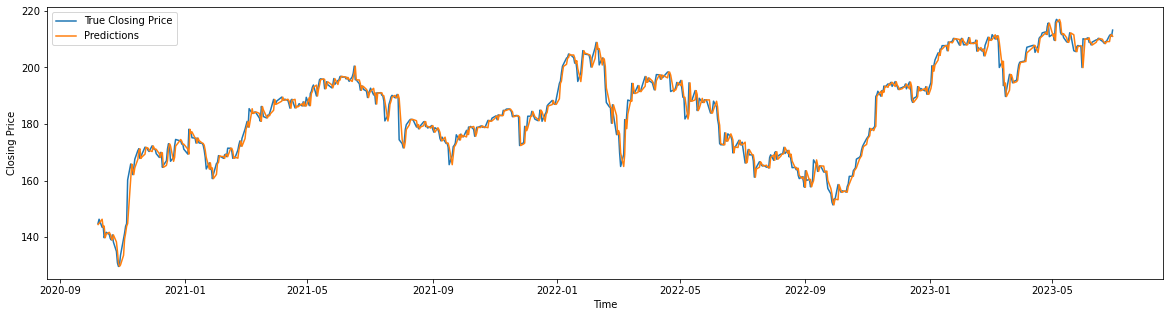

In [54]:
#plotting predicted data
plt.figure(figsize=(20, 5))
plt.plot(ALV_test['Target'], label = 'True Closing Price')
plt.plot(ALV_test['Predicted_Close'], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(labels = ['True Closing Price', 'Predictions'])

In [55]:
# Extract actual data from alv
tem1 = ALV_base['Close'].tolist()[:len(ALV_base)-695]
# Extract forecasted date from above result
tem2 = ALV_test['Predicted_Close'].tolist()
# Combine them to a list
tem3 = tem1 + tem2
# Create a column from the resulted list
result1['ALV'] = tem3
result1

,SIE,Forecasted,DTE,ALV
Date,,,,
2010-01-04,39.892437,N,4.953136,45.519119
2010-01-05,39.916805,N,4.911083,45.657921
2010-01-06,40.063042,N,4.789590,46.012665
2010-01-07,40.538315,N,4.698472,45.483131
2010-01-08,40.794235,N,4.724171,45.236355
...,...,...,...,...
2023-06-26,156.854762,Y,19.552452,209.103934
2023-06-27,155.357408,Y,19.690342,209.153900
2023-06-28,157.433741,Y,19.900178,211.252364


# Merck KGaA 1 Features

In [56]:
#Set next day value as target 
MRK['Target'] = MRK.Close.shift(-1)
MRK.dropna(inplace=True)
MRK

,Close,pe-ratio,pb-ratio,Target
Date,,,,
2010-01-04,26.576839,38.785717,1.488928,26.381214
2010-01-05,26.381214,38.785717,1.488928,26.364910
2010-01-06,26.364910,38.785717,1.488928,26.919188
2010-01-07,26.919188,38.785717,1.488928,26.646120
2010-01-08,26.646120,38.785717,1.488928,26.739857
...,...,...,...,...
2023-06-23,152.949997,23.026846,3.013593,152.600006
2023-06-26,152.600006,23.026846,3.013593,147.199997
2023-06-27,147.199997,23.026846,3.013593,150.500000


In [57]:
#split train and test data
MRK_train = MRK.loc[:end_date]
MRK_test = MRK.loc[test_start_date:]

In [58]:
# Reconcile length of data set and subsets
MRK.shape[0] == MRK_train.shape[0] + MRK_test.shape[0]

True

In [59]:
#set variables for regression
MRK_X_train = MRK_train[['Close']]
MRK_y_train = MRK_train['Target']
MRK_X_test = MRK_test[['Close']]
MRK_y_test = MRK_test['Target']

In [60]:
#creating regressor model
model4 = LinearRegression()

In [61]:
# fit liner regression model
model4 = model4.fit(MRK_X_train, MRK_y_train)

In [62]:
model4.score(MRK_X_train, MRK_y_train)

0.9985159073819684

In [63]:
model4.coef_

array([0.99980892])

In [64]:
model4.intercept_

0.04863598057534091

In [65]:
MRK_test['Predicted_Close'] = model4.predict(MRK_X_test)

In [66]:
MRK_test

,Close,pe-ratio,pb-ratio,Target,Predicted_Close
Date,,,,,
2020-10-08,126.032745,28.965117,3.009257,126.661209,126.057298
2020-10-09,126.661209,28.965117,3.009257,126.661209,126.685642
2020-10-12,126.661209,28.965117,3.009257,126.226120,126.685642
2020-10-13,126.226120,28.965117,3.009257,124.098984,126.250636
2020-10-14,124.098984,28.965117,3.009257,119.699684,124.123906
...,...,...,...,...,...
2023-06-23,152.949997,23.026846,3.013593,152.600006,152.969407
2023-06-26,152.600006,23.026846,3.013593,147.199997,152.619483
2023-06-27,147.199997,23.026846,3.013593,150.500000,147.220505


In [67]:
#again return to previous shape
MRK_y_test = np.array(MRK_test['Target'])

In [68]:
#checking mse and rmse 
MRK_mse = mean_squared_error(MRK_y_test, MRK_test['Predicted_Close'])
MRK_rmse = m.sqrt(MRK_mse)
MRK_mape = np.mean(np.abs(MRK_test['Predicted_Close'] - MRK_y_test)/np.abs(MRK_y_test))

print(f'Root Mean Squared Error (RMSE): {MRK_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {MRK_mape}')

Root Mean Squared Error (RMSE): 2.9986685694383066
Mean Absolute Percentage Error (MAPE): 0.012815393656274059


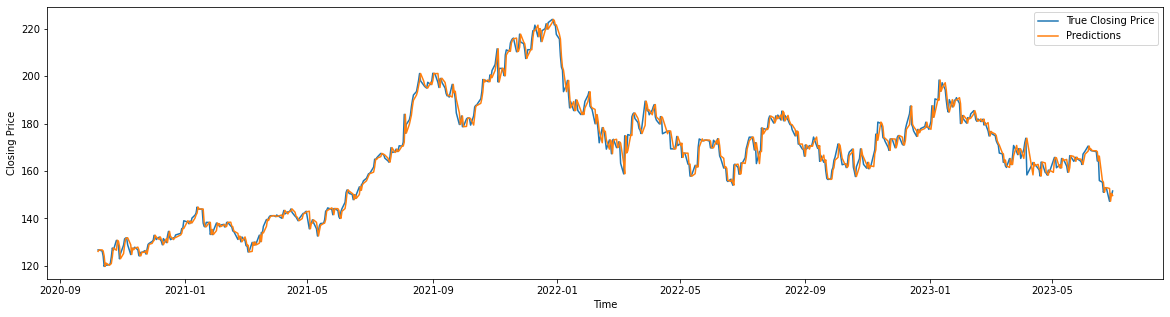

In [69]:
#plotting predicted data
plt.figure(figsize=(20, 5))
plt.plot(MRK_test['Target'], label = 'True Closing Price')
plt.plot(MRK_test['Predicted_Close'], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(labels = ['True Closing Price', 'Predictions'])

In [70]:
# Extract actual data from MRK
tem1 = MRK_base['Close'].tolist()[:len(MRK_base)-695]
# Extract forecasted date from above result
tem2 = MRK_test['Predicted_Close'].tolist()
# Combine them to a list
tem3 = tem1 + tem2
# Create a column from the resulted list
result1['MRK'] = tem3
result1

,SIE,Forecasted,DTE,ALV,MRK
Date,,,,,
2010-01-04,39.892437,N,4.953136,45.519119,26.576839
2010-01-05,39.916805,N,4.911083,45.657921,26.381214
2010-01-06,40.063042,N,4.789590,46.012665,26.364910
2010-01-07,40.538315,N,4.698472,45.483131,26.919188
2010-01-08,40.794235,N,4.724171,45.236355,26.646120
...,...,...,...,...,...
2023-06-26,156.854762,Y,19.552452,209.103934,152.969407
2023-06-27,155.357408,Y,19.690342,209.153900,152.619483
2023-06-28,157.433741,Y,19.900178,211.252364,147.220505


# Deutsche Post 1 Features

In [71]:
#Set next day value as target 
DHL['Target'] = DHL.Close.shift(-1)
DHL.dropna(inplace=True)
DHL

,Close,pe-ratio,pb-ratio,Target
Date,,,,
2010-01-04,13.980000,25.443396,1.970697,14.000
2010-01-05,14.000000,25.443396,1.970697,14.155
2010-01-06,14.155000,25.443396,1.970697,14.125
2010-01-07,14.125000,25.443396,1.970697,14.460
2010-01-08,14.460000,25.443396,1.970697,14.380
...,...,...,...,...
2023-06-23,43.189999,10.613300,1.588590,43.000
2023-06-26,43.000000,10.613300,1.588590,43.500
2023-06-27,43.500000,10.613300,1.588590,44.305


In [72]:
#split train and test data
DHL_train = DHL.loc[:end_date]
DHL_test = DHL.loc[test_start_date:]

In [73]:
# Reconcile length of data set and subsets
DHL.shape[0] == DHL_train.shape[0] + DHL_test.shape[0]

True

In [74]:
#set variables for regression
DHL_X_train = DHL_train[['Close']]
DHL_y_train = DHL_train['Target']
DHL_X_test = DHL_test[['Close']]
DHL_y_test = DHL_test['Target']

In [75]:
#creating regressor model
model5 = LinearRegression()

In [76]:
# fit liner regression model
model5 = model5.fit(DHL_X_train, DHL_y_train)

In [77]:
model5.score(DHL_X_train, DHL_y_train)

0.997957355894686

In [78]:
model5.coef_

array([0.99947111])

In [79]:
model5.intercept_

0.022585124799931577

In [80]:
DHL_test['Predicted_Close'] = model5.predict(DHL_X_test)

In [81]:
DHL_test

,Close,pe-ratio,pb-ratio,Target,Predicted_Close
Date,,,,,
2020-10-08,40.970001,18.933283,3.600308,41.279999,40.970918
2020-10-09,41.279999,18.933283,3.600308,41.299999,41.280751
2020-10-12,41.299999,18.933283,3.600308,41.470001,41.300741
2020-10-13,41.470001,18.933283,3.600308,41.950001,41.470653
2020-10-14,41.950001,18.933283,3.600308,40.709999,41.950399
...,...,...,...,...,...
2023-06-23,43.189999,10.613300,1.588590,43.000000,43.189741
2023-06-26,43.000000,10.613300,1.588590,43.500000,42.999843
2023-06-27,43.500000,10.613300,1.588590,44.305000,43.499578


In [82]:
len(DHL_y_test)

697

In [83]:
#again return to previous shape
DHL_y_test = np.array(DHL_test['Target'])

In [84]:
#checking mse and rmse 
DHL_mse = mean_squared_error(DHL_test['Target'], DHL_test['Predicted_Close'])
DHL_rmse = m.sqrt(DHL_mse)
DHL_mape = np.mean(np.abs(DHL_test['Predicted_Close'] - DHL_y_test)/np.abs(DHL_y_test))

print(f'Root Mean Squared Error (RMSE): {DHL_rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {DHL_mape}')

Root Mean Squared Error (RMSE): 0.7739658350877358
Mean Absolute Percentage Error (MAPE): 0.013201117390826135


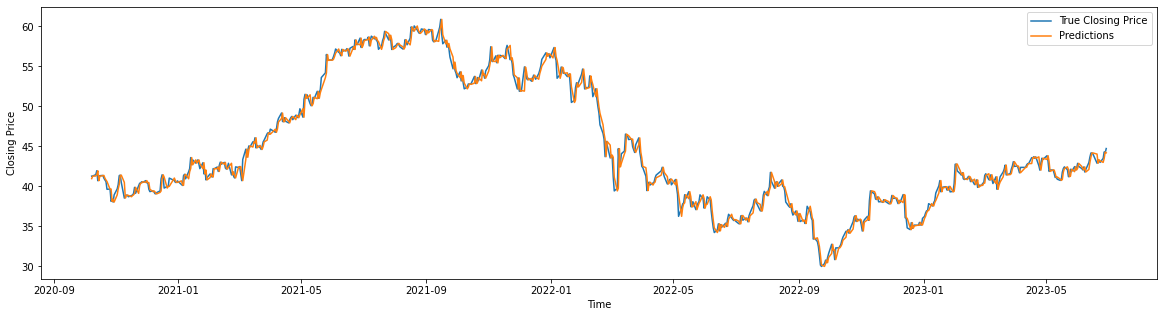

In [85]:
#plotting predicted data
plt.figure(figsize=(20, 5))
plt.plot(DHL_test['Target'], label = 'True Closing Price')
plt.plot(DHL_test['Predicted_Close'], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(labels = ['True Closing Price', 'Predictions'])

In [86]:
# Extract actual data from DHL
tem1 = DHL_base['Close'].tolist()[:len(DHL_base)+8-697]
# Extract forecasted date from above result
tem2 = DHL_test['Predicted_Close'].tolist()
# Combine them to a list
tem3 = tem1 + tem2
# Create a column from the resulted list
result1['DHL'] = tem3
result1

,SIE,Forecasted,DTE,ALV,MRK,DHL
Date,,,,,,
2010-01-04,39.892437,N,4.953136,45.519119,26.576839,13.980000
2010-01-05,39.916805,N,4.911083,45.657921,26.381214,14.000000
2010-01-06,40.063042,N,4.789590,46.012665,26.364910,14.155000
2010-01-07,40.538315,N,4.698472,45.483131,26.919188,14.125000
2010-01-08,40.794235,N,4.724171,45.236355,26.646120,14.460000
...,...,...,...,...,...,...
2023-06-26,156.854762,Y,19.552452,209.103934,152.969407,43.189741
2023-06-27,155.357408,Y,19.690342,209.153900,152.619483,42.999843
2023-06-28,157.433741,Y,19.900178,211.252364,147.220505,43.499578


In [87]:
# Define the desired column order
desired_order = ['SIE', 'DTE', 'ALV', 'MRK', 'DHL', 'Forecasted']

# Rearrange columns
result = result1[desired_order]
result

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,156.854762,19.552452,209.103934,152.969407,43.189741,Y
2023-06-27,155.357408,19.690342,209.153900,152.619483,42.999843,Y
2023-06-28,157.433741,19.900178,211.252364,147.220505,43.499578,Y


In [88]:
#save forecased data in csv file
result.to_csv('LR_1 feature.csv', index=True)

# Bibliography

-	M, S. (2024). _PREDICTING-STOCK-PRICES-WITH-LINEAR-REGRESSION/Predicting Stock Prices with Linear Regression.ipynb at master · shashimanyam/PREDICTING-STOCK-PRICES-WITH-LINEAR-REGRESSION._ [online] GitHub. Available at: https://github.com/shashimanyam/PREDICTING-STOCK-PRICES-WITH-LINEAR-REGRESSION/blob/master/Predicting%20Stock%20Prices%20with%20Linear%20Regression.ipynb [Accessed 26 Feb. 2024].
-	Tripathi, A. (2018). _Stock-Price-Prediction/Stock Price Prediction-using Linear Regression.ipynb at master · karasuno7/Stock-Price-Prediction._ [online] GitHub. Available at: https://github.com/karasuno7/Stock-Price-Prediction/blob/master/Stock%20Price%20Prediction-using%20Linear%20Regression.ipynb [Accessed 26 Feb. 2024].